<a href="https://colab.research.google.com/github/vannessa01/Credit_Scoring_Id-x_partners_project/blob/main/Credit_Scoring_Id_x_partner_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Scoring Machine Learning Model
- Vannessa Yoanita Oktorio Naibaho


# Background

At this time, machine learning modeling will be carried out to predict whether someone is able to pay off credit or not.
We can assume ourselves as Data Scientist in a company engaged in the field of finance.

# Problem

The risk management division wants to know which prospective borrowers meet the standards for applying for credit. To reduce the risk of default and the company incurring losses.

# Goals

Create a machine learning model that can detect potential customers who meet the standards to apply and are estimated to be able to pay off the credit. So we can reduce the risk of default.

# Column Description

The data we will use is loan_data_2007_2014.csv. The data has 74 features.

# Libraries

In [1]:
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 99)
import matplotlib as mat
import matplotlib.pyplot as plt    
import numpy as np
import seaborn as sns
%matplotlib inline
from datetime import datetime
from datetime import date
from datetime import datetime
import time
from sklearn.preprocessing import StandardScaler, MinMaxScaler

sns.set()

#import ppscore as pps

import warnings
warnings.filterwarnings("ignore")

# Import Data

In [2]:
# Import Data

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Portofolio/Internship Id x Partners/loan_data_2007_2014.csv')

Mounted at /content/drive


# Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [4]:
df.shape

(466285, 75)

In [5]:
df.sample()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
17640,17640,713271,906476,10000,10000,10000.0,36 months,15.65,349.85,D,D4,st johns clinic,5 years,MORTGAGE,300000.0,Source Verified,Mar-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,home_improvement,new deck,657xx,MO,13.98,1.0,Jun-01,0.0,20.0,NaN,9.0,0.0,0,0.0,27.0,f,0.0,0.0,10382.72,10382.72,10000.0,382.72,0.0,0.0,0.0,Jul-11,9685.65,NaN,Jul-11,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df[['id', 'member_id']].nunique()

id           466285
member_id    466285
dtype: int64

In [7]:
df[['id', 'member_id']].duplicated().sum()

0

The dataset consists of 466285 and 75 columns. there is no duplicate data found in this dataset. it shows that each row already represents each individual.

In [8]:
cols_to_drop = [
    # unique id
    'id'
    , 'member_id'
    
    # free text
    , 'url'
    , 'desc'
    
    # all null / constant / others
    , 'zip_code' 
    , 'annual_inc_joint'
    , 'dti_joint'
    , 'verification_status_joint'
    , 'open_acc_6m'
    , 'open_il_6m'
    , 'open_il_12m'
    , 'open_il_24m'
    , 'mths_since_rcnt_il'
    , 'total_bal_il'
    , 'il_util'
    , 'open_rv_12m'
    , 'open_rv_24m'
    , 'max_bal_bc'
    , 'all_util'
    , 'inq_fi'
    , 'total_cu_tl'
    , 'inq_last_12m'
    
    # expert judgment
    , 'sub_grade'
]

In [9]:
df1 = df.drop(cols_to_drop, axis=1)

# Define Status or Target

In project credit risk modeling, the main objective is to predict individuals on their ability to make payments on loans/credits. Therefore, the target variable used must reflect the individual's ability in this regard.

In this dataset, the variable `loan_status` is a variable that can be used as a target variable because it reflects the performance of each individual in making payments on loans/credits so far.

In [10]:
df1['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

The description of the status category is as follows:

- Charged Off: This occurs when the creditor has given up on collecting the money owed and has decided to categorize the debt as bad debt, meaning it is a loss for the company.

- Current: a Loan as to which all principal and interest payments then due have been paid, except for the most recent payment then due of principal and interest.

- In Grace Period: allows a borrower or insurance customer to delay payment for a short period beyond the due date.

- Default: occurs when a borrower fails to pay back a debt according to the initial arrangement.

From these definitions, each individual can be marked whether they are a bad loan (bad borrower) or good loan (good borrower).

The definition of bad and good loan can sometimes be different depending on business needs. In this example, I'm using a late payment of over 30 days and worse than that as a bad loan marker.

In [11]:
bad_status = [
    'Charged Off',
    'Default',
    'Does not meet the credit policy. Status:Charged Off',
    'Late (31-120 days)'
]
df1['bad_flag'] = np.where(df1['loan_status'].isin(bad_status),1,0)

In [12]:
df1['bad_flag'].value_counts()

0    415317
1     50968
Name: bad_flag, dtype: int64

In [13]:
df1['bad_flag'].value_counts(normalize=True)*100

0    89.069346
1    10.930654
Name: bad_flag, dtype: float64

After determining which target borrowers are bad (1) or good (0),
we can see that the frequency of borrowers with good predicates is much higher, with a ratio of 89:11.

This situation can cause the dataset to be imbalanced.

In [14]:
df1.drop('loan_status', axis=1, inplace=True)


remove the origin column 'loan_status'

# Cleaning, Preprocessing and Feature Engineering


In this step, some features are cleaned/modified into a format that can be used for modeling.

In [15]:
df2 = df1.copy()

## Extracting emp length


Modify `emp_length`. Example: 4 years -> 4

In [16]:
df2['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [17]:
df2['emp_length_int'] = df2['emp_length'].str.replace('\+ years', '')
df2['emp_length_int'] = df2['emp_length_int'].str.replace('< 1 year', str(0))
df2['emp_length_int'] = df2['emp_length_int'].str.replace(' years', '')
df2['emp_length_int'] = df2['emp_length_int'].str.replace(' year', '')

In [18]:
df2['emp_length_int'] = df2['emp_length_int'].astype(float)

In [19]:
df2['emp_length_int'].unique()

array([10.,  0.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7., nan])

In [20]:
df2.drop('emp_length', axis=1, inplace=True)

## Extract Term Months

In [21]:
df3 = df2.copy()

In [22]:
df3['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [23]:
df3['term_int'] = df3['term'].str.replace(' months', '')
df3['term_int'] = df3['term_int'].astype(float)

df3['term_int'].unique()

array([36., 60.])

## Extract earliest cr line

We modify the earliest_cr_line from month-year format to calculate how much time has passed since that time. To do this, it is common to use reference date = today.

However, because this dataset is a 2007-2014 dataset, it will be more relevant to use a reference date around 2017. In this example, I use 2017-12-01 as the reference date.

In [24]:
#df2.head().T

In [25]:
df3['earliest_cr_line'].head()

0    Jan-85
1    Apr-99
2    Nov-01
3    Feb-96
4    Jan-96
Name: earliest_cr_line, dtype: object

In [26]:
df3['earliest_cr_line_date'] = pd.to_datetime(df3['earliest_cr_line'], format='%b-%y')
df3['earliest_cr_line_date'].head()

0   1985-01-01
1   1999-04-01
2   2001-11-01
3   1996-02-01
4   1996-01-01
Name: earliest_cr_line_date, dtype: datetime64[ns]

In [27]:
df3['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df3['earliest_cr_line_date']) / np.timedelta64(1, 'M')))
df3['mths_since_earliest_cr_line'].head()

0    395.0
1    224.0
2    193.0
3    262.0
4    263.0
Name: mths_since_earliest_cr_line, dtype: float64

In [28]:
df3['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64


we can see that there is something strange here, some negative values.

In [29]:
df3[df3['mths_since_earliest_cr_line']<0][['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']].head()

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-537.0
1770,Sep-68,2068-09-01,-609.0
2799,Sep-64,2064-09-01,-561.0
3282,Sep-67,2067-09-01,-597.0
3359,Feb-65,2065-02-01,-566.0


we can see that the negative value appears because the function misinterprets the year 62 to be the year 2062, when it should be 1962.

To overcome this, we can do further preprocessing if we want to justify the year 2062 to 1962. However, this time I only changed the negative value to the maximum value of the feature. Since I know here that negative values ​​are old data (1900s), it still makes sense if I change these values ​​to the largest value.

In [30]:
df3.loc[df3['mths_since_earliest_cr_line']<0, 'mths_since_earliest_cr_line'] = df3['mths_since_earliest_cr_line'].max()

In [31]:
df3.drop(['earliest_cr_line', 'earliest_cr_line_date'], axis=1, inplace=True)

## Extract issue_d

The concept of preprocessing that is done here is the same as that of the `earliest_cr_line` variable.

In [32]:
df3['issue_d_date'] = pd.to_datetime(df3['issue_d'], format='%b-%y')
df3['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df3['issue_d_date']) / np.timedelta64(1, 'M')))

In [33]:
df3['mths_since_issue_d'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64

In [34]:
df3.drop(['issue_d', 'issue_d_date'], axis=1, inplace=True)

## Extract last_pymnt_d

The concept of preprocessing that is done here is the same as that of the earliest_cr_line variable.

In [35]:
df3['last_pymnt_d_date'] = pd.to_datetime(df3['last_pymnt_d'], format='%b-%y')
df3['mths_since_last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df3['last_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [36]:
df3['mths_since_last_pymnt_d'].describe()

count    465909.000000
mean         31.294369
std          12.809898
min          23.000000
25%          23.000000
50%          24.000000
75%          35.000000
max         120.000000
Name: mths_since_last_pymnt_d, dtype: float64

In [37]:
df3.drop(['last_pymnt_d', 'last_pymnt_d_date'], axis=1, inplace=True)

## Extract next_pymnt_d

The concept of preprocessing that is done here is the same as that of the earliest_cr_line variable.

In [38]:
df3['next_pymnt_d_date'] = pd.to_datetime(df3['next_pymnt_d'], format='%b-%y')
df3['mths_since_next_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df3['next_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [39]:
df3['mths_since_next_pymnt_d'].describe()

count    239071.000000
mean         22.738136
std           6.082298
min          21.000000
25%          22.000000
50%          22.000000
75%          22.000000
max         120.000000
Name: mths_since_next_pymnt_d, dtype: float64

In [40]:
df3.drop(['next_pymnt_d', 'next_pymnt_d_date'], axis=1, inplace=True)

## Extract last_credit_pull_d

Konsep preprocessing yang dilakukan sama dengan yang dilakukan terhadap variabel earliest_cr_line

In [41]:
df3['last_credit_pull_d_date'] = pd.to_datetime(df3['last_credit_pull_d'], format='%b-%y')
df3['mths_since_last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df3['last_credit_pull_d_date']) / np.timedelta64(1, 'M')))

In [42]:
df3['mths_since_last_credit_pull_d'].describe()

count    466243.000000
mean         27.045588
std           9.636423
min          23.000000
25%          23.000000
50%          23.000000
75%          25.000000
max         127.000000
Name: mths_since_last_credit_pull_d, dtype: float64

In [43]:
df3.drop(['last_credit_pull_d', 'last_credit_pull_d_date'], axis=1, inplace=True)

# Exploratory Data Analysis

## Checking Correlation

In [44]:
df5 = df3.copy()

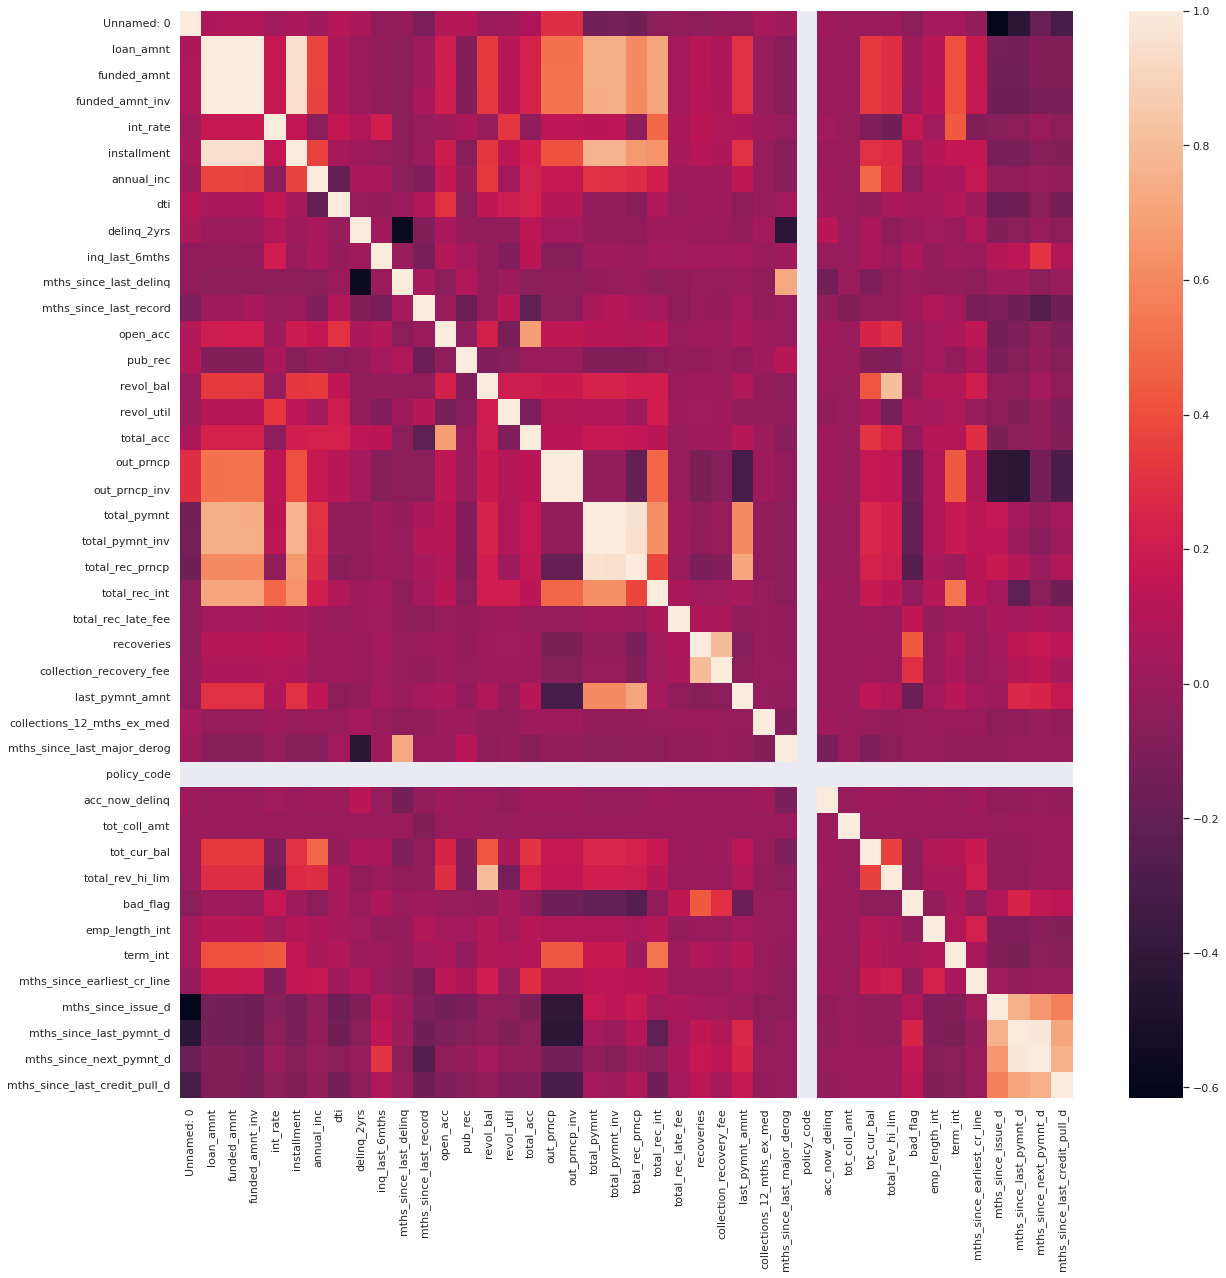

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df5.corr())

If there are pairs of features that have a high correlation, only one will be taken. The correlation value that is used as a benchmark as a high correlation is uncertain, generally the number 0.7 is used.

In [45]:
corr_matrix = df5.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]

In [46]:
to_drop_hicorr

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'mths_since_last_major_derog',
 'total_rev_hi_lim',
 'mths_since_last_pymnt_d',
 'mths_since_next_pymnt_d',
 'mths_since_last_credit_pull_d']

In [47]:
df5.drop(to_drop_hicorr, axis=1, inplace=True)

In [48]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 38 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   loan_amnt                    466285 non-null  int64  
 2   term                         466285 non-null  object 
 3   int_rate                     466285 non-null  float64
 4   grade                        466285 non-null  object 
 5   emp_title                    438697 non-null  object 
 6   home_ownership               466285 non-null  object 
 7   annual_inc                   466281 non-null  float64
 8   verification_status          466285 non-null  object 
 9   pymnt_plan                   466285 non-null  object 
 10  purpose                      466285 non-null  object 
 11  title                        466265 non-null  object 
 12  addr_state                   466285 non-null  object 
 13 

## Check Categorical Features

In [49]:
df5.select_dtypes(include='object').nunique()

term                        2
grade                       7
emp_title              205475
home_ownership              6
verification_status         3
pymnt_plan                  2
purpose                    14
title                   63099
addr_state                 50
initial_list_status         2
application_type            1
dtype: int64

At this stage, the features that have a very high unique value (high cardinality) are removed and features that only have one unique value.

In [50]:
df3.drop(['emp_title', 'title', 'application_type'], axis=1, inplace=True)

In [51]:
df5.select_dtypes(exclude='object').nunique()

Unnamed: 0                     466285
loan_amnt                        1352
int_rate                          506
annual_inc                      31901
dti                              3997
delinq_2yrs                        24
inq_last_6mths                     28
mths_since_last_delinq            145
mths_since_last_record            123
open_acc                           62
pub_rec                            26
revol_bal                       58142
revol_util                       1269
total_acc                         112
out_prncp                      135665
total_rec_late_fee               5808
recoveries                      22773
collections_12_mths_ex_med          9
policy_code                         1
acc_now_delinq                      6
tot_coll_amt                     6321
tot_cur_bal                    220690
bad_flag                            2
emp_length_int                     11
term_int                            2
mths_since_earliest_cr_line       515
mths_since_i

Apparently, in data types other than objects there are also features that only have one unique value, so they will be dropped as well.

In [52]:
df5.drop(['Unnamed: 0', 'policy_code'], axis=1, inplace=True)

Apparently, in data types other than objects there are also features that only have one unique value, so they will be discarded as well.
Column 'Unnamed: 0' is also dropped because it is not known what the contents of that column are.

In [53]:
for col in df5.select_dtypes(include='object').columns.tolist():
    print(df5[col].value_counts(normalize=True)*100)
    print('\n')

 36 months    72.477776
 60 months    27.522224
Name: term, dtype: float64


B    29.365946
C    26.870476
D    16.489486
A    16.056060
E     7.668486
F     2.837106
G     0.712440
Name: grade, dtype: float64


Teacher                              1.230690
Manager                              1.011632
Registered Nurse                     0.527927
RN                                   0.502397
Supervisor                           0.448373
                                       ...   
The Eastern Arizona AHEC             0.000228
Delaware Quarries.com                0.000228
McCauley trucking and warehousing    0.000228
save mart supermarkets               0.000228
Server Engineer Lead                 0.000228
Name: emp_title, Length: 205475, dtype: float64


MORTGAGE    50.586015
RENT        40.420129
OWN          8.943886
OTHER        0.039032
NONE         0.010723
ANY          0.000214
Name: home_ownership, dtype: float64


Verified           36.041262
Source Verified    32.167666
Not

Features that are strongly dominated by just one value will be dropped at this stage.

In [54]:
df5.drop('pymnt_plan', axis=1, inplace=True)

In [55]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 35 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   term                         466285 non-null  object 
 2   int_rate                     466285 non-null  float64
 3   grade                        466285 non-null  object 
 4   emp_title                    438697 non-null  object 
 5   home_ownership               466285 non-null  object 
 6   annual_inc                   466281 non-null  float64
 7   verification_status          466285 non-null  object 
 8   purpose                      466285 non-null  object 
 9   title                        466265 non-null  object 
 10  addr_state                   466285 non-null  object 
 11  dti                          466285 non-null  float64
 12  delinq_2yrs                  466256 non-null  float64
 13 

## Univariate Analysis

In [56]:
for i in df5.columns:
    if df5[i].dtypes != 'object':
        print(i,df5[i].nunique())

loan_amnt 1352
int_rate 506
annual_inc 31901
dti 3997
delinq_2yrs 24
inq_last_6mths 28
mths_since_last_delinq 145
mths_since_last_record 123
open_acc 62
pub_rec 26
revol_bal 58142
revol_util 1269
total_acc 112
out_prncp 135665
total_rec_late_fee 5808
recoveries 22773
collections_12_mths_ex_med 9
acc_now_delinq 6
tot_coll_amt 6321
tot_cur_bal 220690
bad_flag 2
emp_length_int 11
term_int 2
mths_since_earliest_cr_line 515
mths_since_issue_d 91


In [57]:
for i in df5.columns:
    if df5[i].dtypes == 'object':
        print(i,df5[i].nunique())

term 2
grade 7
emp_title 205475
home_ownership 6
verification_status 3
purpose 14
title 63099
addr_state 50
initial_list_status 2
application_type 1


In [58]:
df7= df5.copy()

In [59]:
num = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'total_rec_late_fee', 'recoveries', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'emp_length_int', 'emp_length_int', 'term_int', 'mths_since_earliest_cr_line',
       'mths_since_issue_d']
cat = ['term', 'grade', 'home_ownership', 'purpose', 'addr_state', 'initial_list_status', 'bad_flag']

### Individuals Boxplots (Numericals)

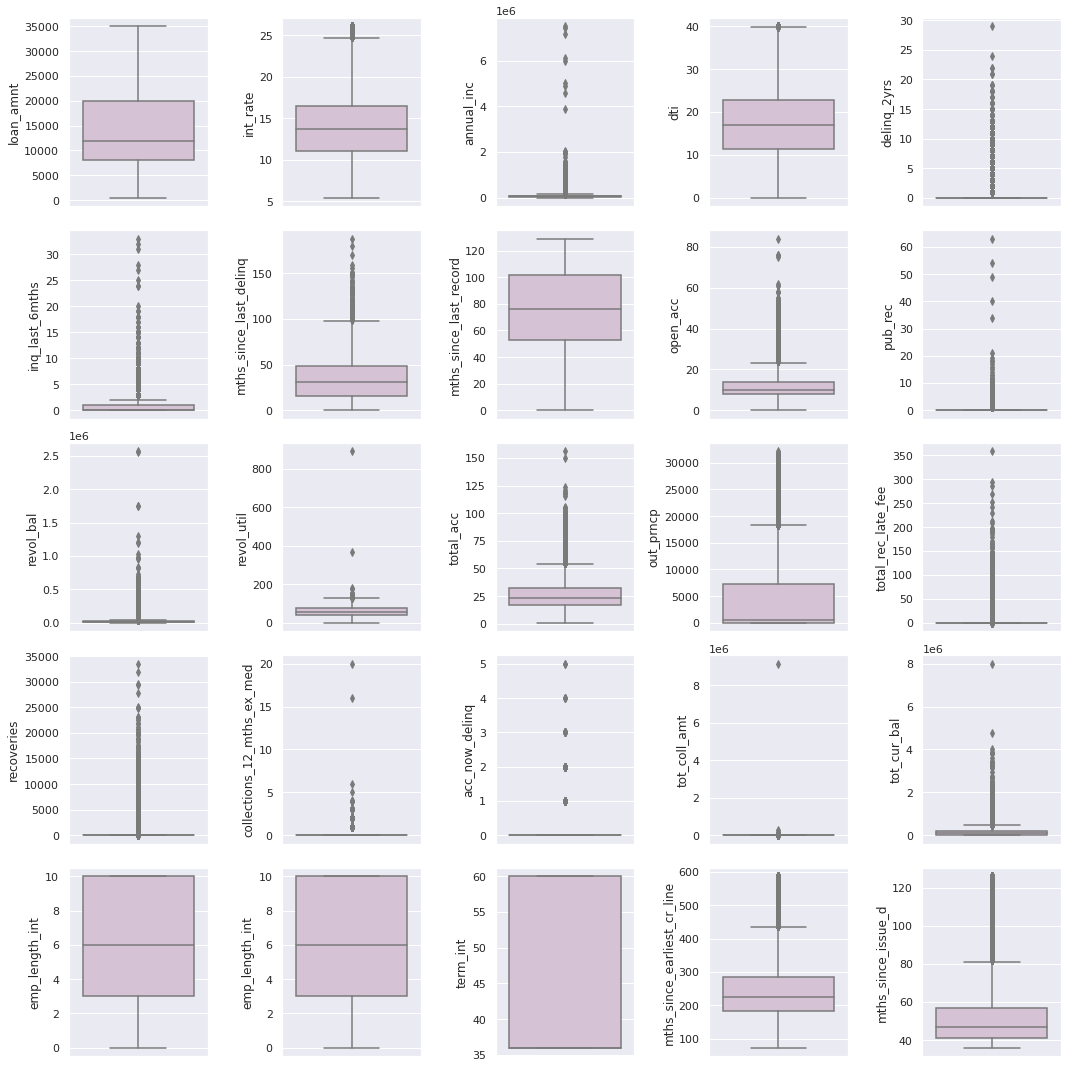

In [ ]:
plt.figure(figsize=(15, 15))
for i in range(0, len(num)):
    plt.subplot(5, 5,  i+1)
    sns.boxplot(y=df7[num[i]], color='thistle', orient='v')
    plt.tight_layout()

### Individuals Displots (Numericals)

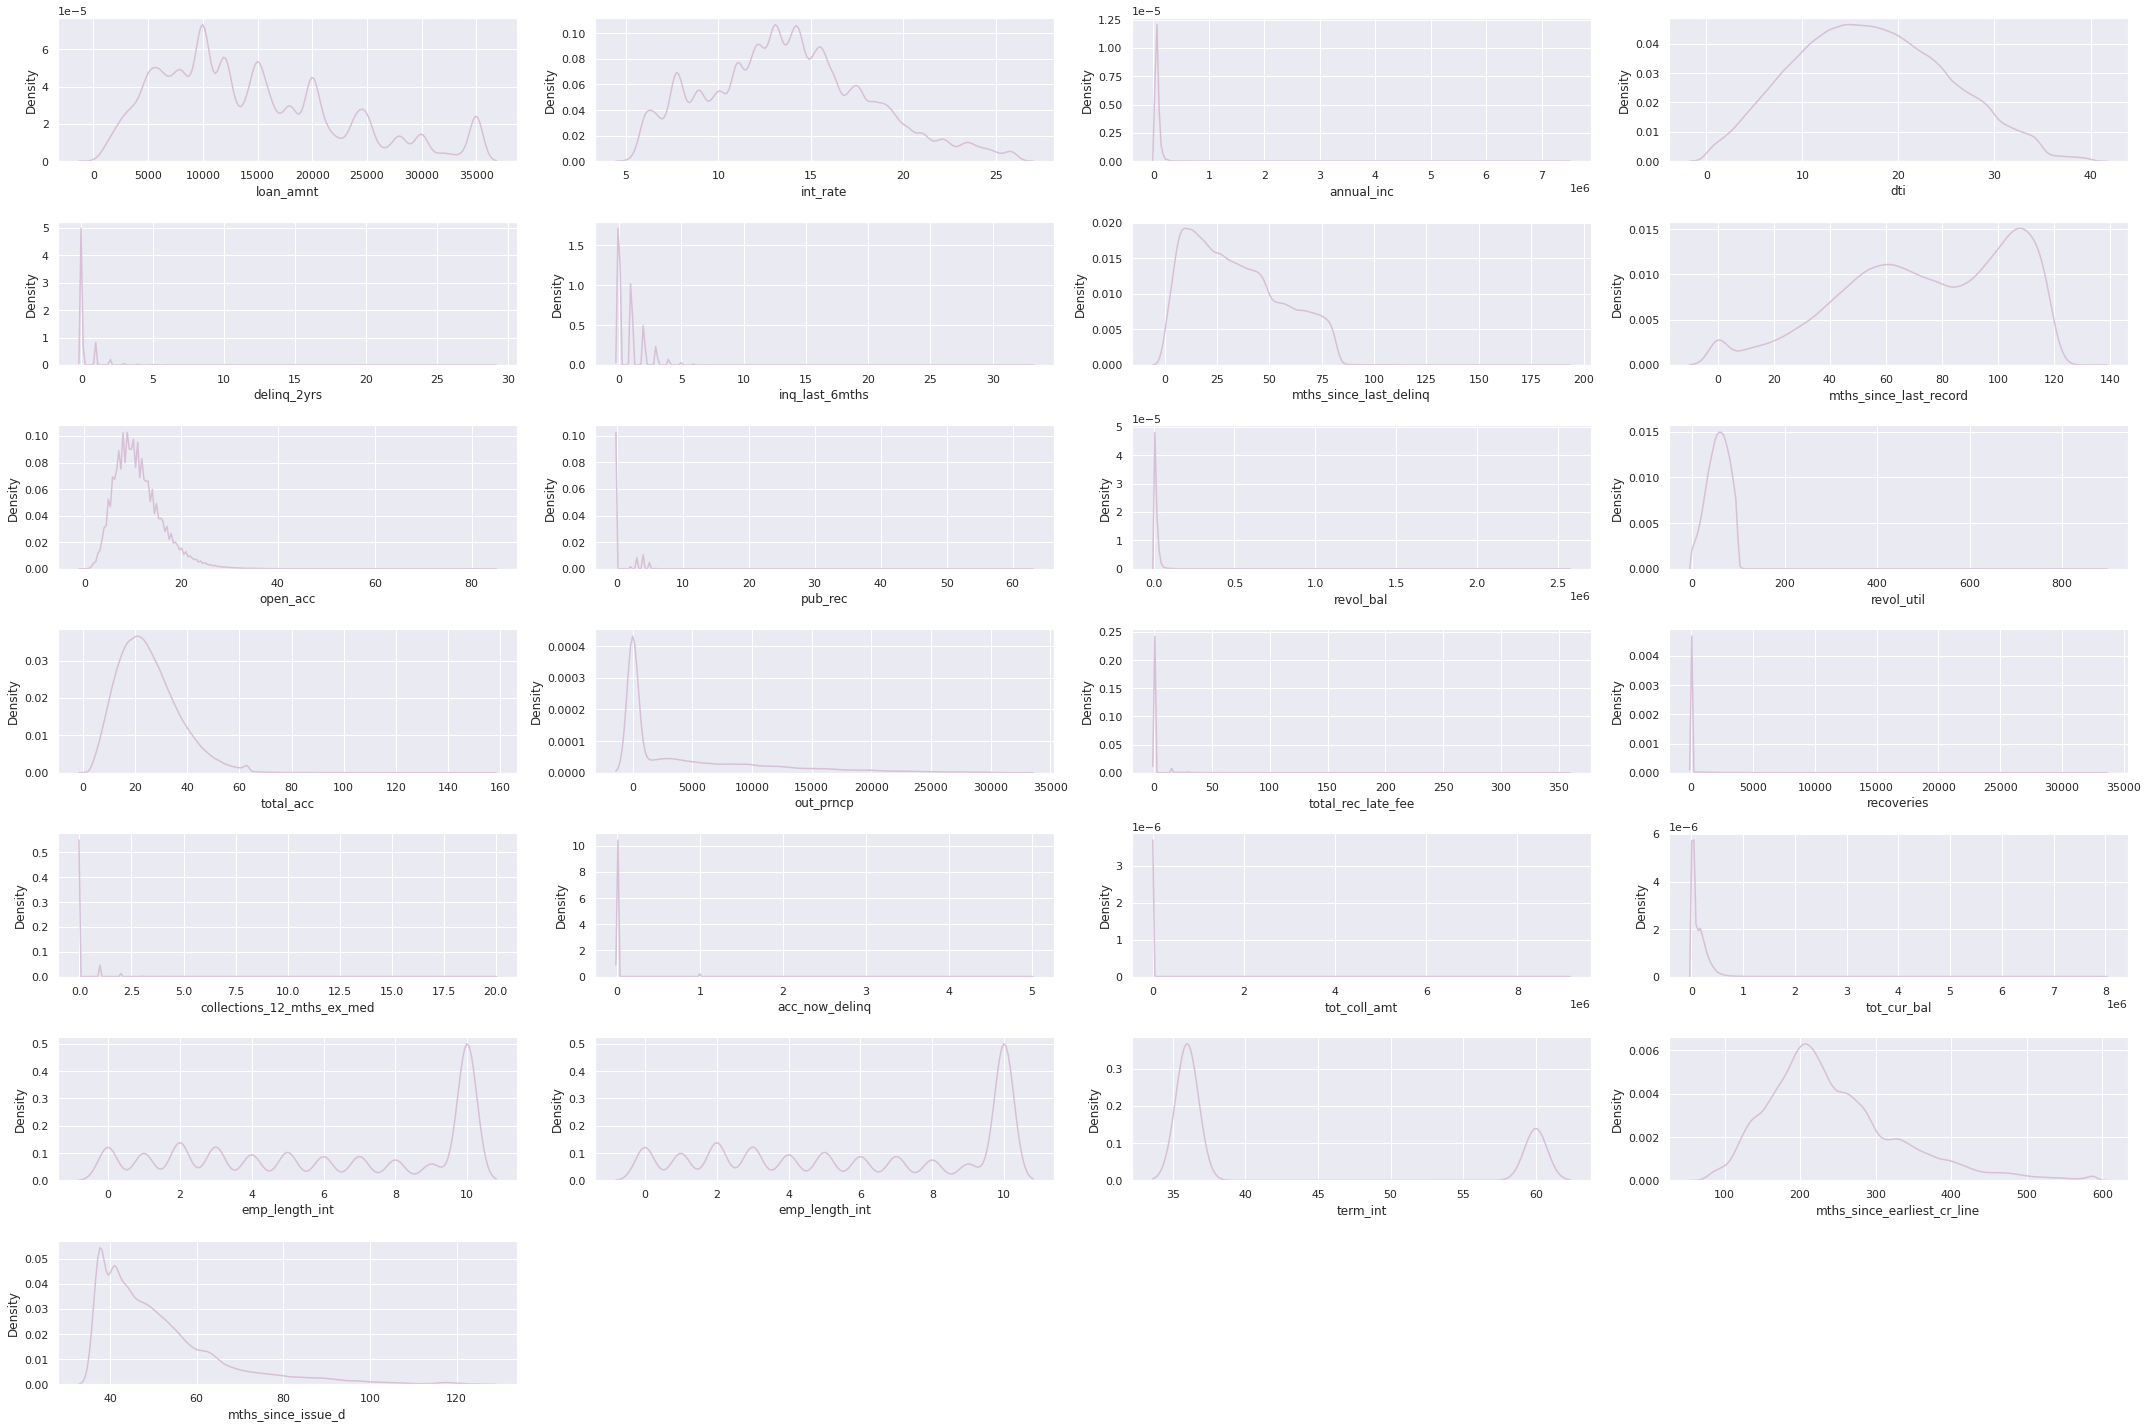

In [ ]:
Feature = num
plt.figure(figsize=(30, 20))
for i in range(0, len(Feature)):
    plt.subplot(7, 4, i+1)
    sns.kdeplot(x=df7[Feature[i]], color='thistle')
    plt.xlabel(Feature[i])
    plt.tight_layout()

### Countplot Categorical

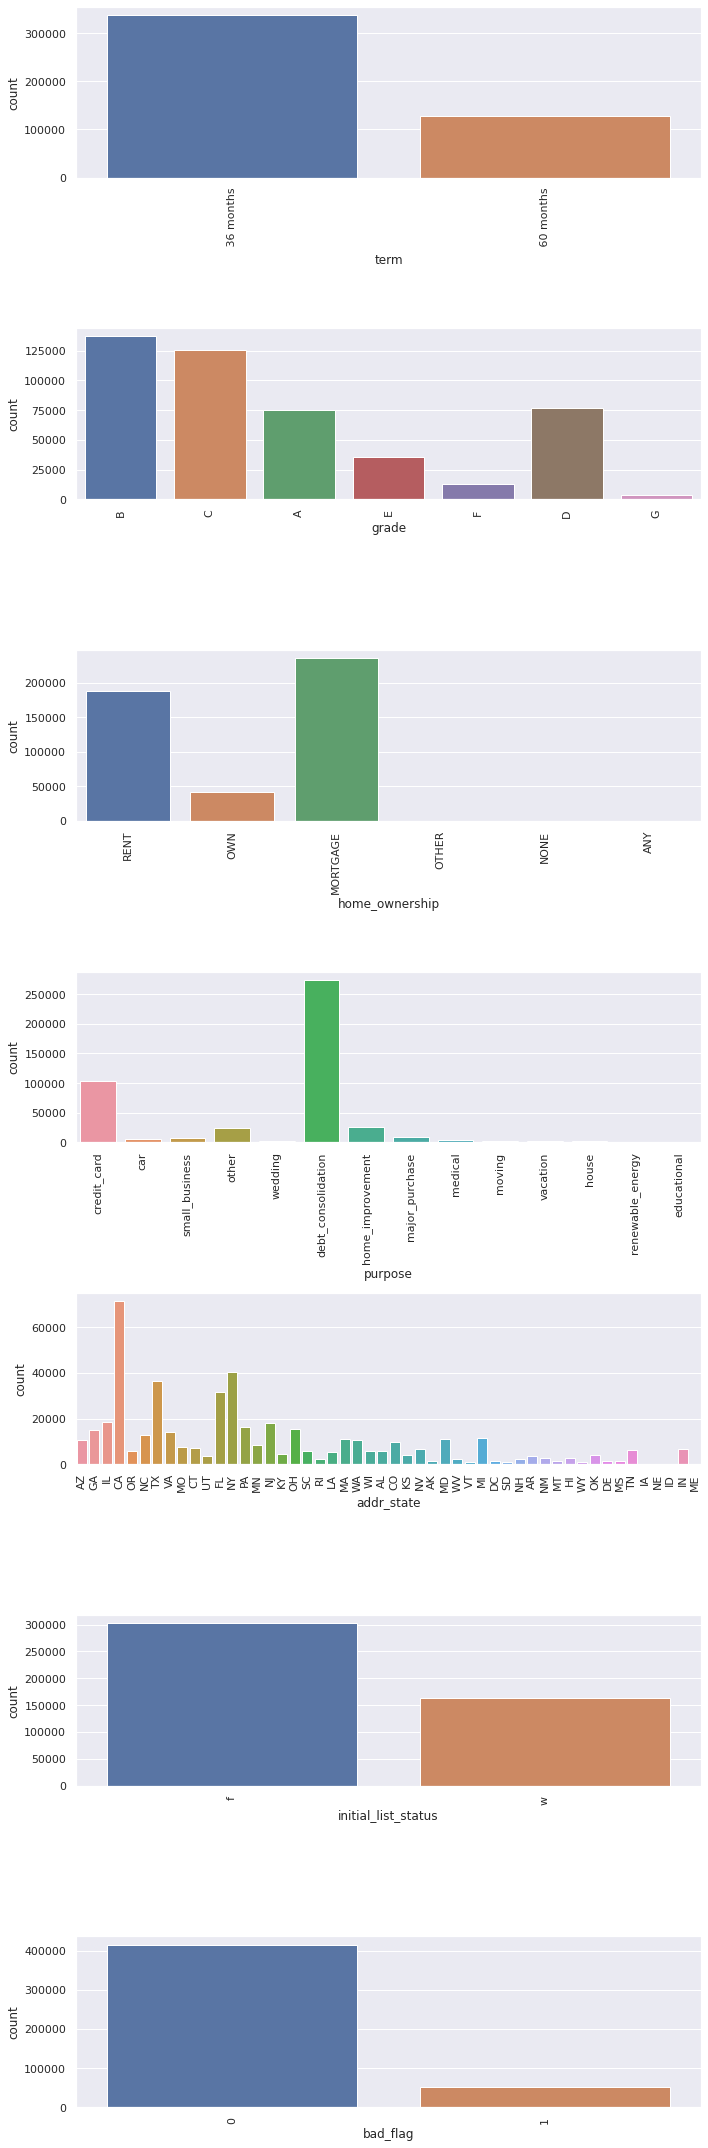

In [61]:
cat
plt.figure(figsize=(10, 30))
for i in range(0, len(cat)):
    plt.subplot(7, 1, i+1)
    sns.countplot(x=df7[cat[i]]),
    plt.xticks(rotation=90),
    plt.tight_layout()

As we can see, there are several insights that we can see from the barchart above, including:
1. The term that many borrowers choose is 36 months.
2. loan grades with the most individuals are loan grades B, C, A, and D.
3. The highest borrower's home ownership status is morgage, second is rent, and third is own.
4. The lending category with the first rank is debt consolidation, second is credit card, and third is home improvement.
5. The initial listing status of the loan with the highest number is fractional and the second is whole.
6. The number of targets declared with bad borrowers is much less than those with good borrowers. This is in accordance with the fact that generally happens that the number of bad borrowers is much less than the good ones.

# Missing Values

## Missing Values Checking

In [ ]:
check_miss = df7.isnull().sum() * 100/ df7.shape[0]
check_miss[check_miss > 0].sort_values(ascending=False)

mths_since_last_record         86.566585
mths_since_last_delinq         53.690554
tot_cur_bal                    15.071469
tot_coll_amt                   15.071469
emp_title                       5.916553
emp_length_int                  4.505399
revol_util                      0.072917
collections_12_mths_ex_med      0.031097
total_acc                       0.006219
acc_now_delinq                  0.006219
pub_rec                         0.006219
open_acc                        0.006219
inq_last_6mths                  0.006219
delinq_2yrs                     0.006219
mths_since_earliest_cr_line     0.006219
title                           0.004289
annual_inc                      0.000858
dtype: float64

The columns with missing values ​​above 75% will be dropped.

In [ ]:
df7.drop('mths_since_last_record', axis=1, inplace=True)

## Missing Value Filling

In [ ]:
df7['mths_since_last_delinq'].fillna(0, inplace=True)
df7['tot_coll_amt'].fillna(0, inplace=True)
df7['tot_cur_bal'].fillna(0, inplace=True)
df7['emp_length_int'].fillna(0, inplace=True)
df7['revol_util'].fillna(0, inplace=True)
df7['collections_12_mths_ex_med'].fillna(0, inplace=True)
df7['delinq_2yrs'].fillna(0, inplace=True)
df7['inq_last_6mths'].fillna(0, inplace=True)
df7['open_acc'].fillna(0, inplace=True)
df7['pub_rec'].fillna(0, inplace=True)
df7['total_acc'].fillna(0, inplace=True)
df7['acc_now_delinq'].fillna(-1, inplace=True)
df7['mths_since_earliest_cr_line'].fillna(0, inplace=True)
df7['annual_inc'].fillna(df7['annual_inc'].mean(), inplace=True)

# Feature Scaling and Transformation

## Label Encoding

All categorical columns are done by label Encoding.

In [ ]:
df8 = df7.copy()

In [ ]:
df8.head()

,loan_amnt,term,int_rate,grade,emp_title,home_ownership,annual_inc,verification_status,purpose,title,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,bad_flag,emp_length_int,term_int,mths_since_earliest_cr_line,mths_since_issue_d
0,5000,36 months,10.65,B,NaN,RENT,24000.0,Verified,credit_card,Computer,AZ,27.65,0.0,1.0,0.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.00,0.00,0.0,INDIVIDUAL,0.0,0.0,0.0,0,10.0,36.0,395.0,72.0
1,2500,60 months,15.27,C,Ryder,RENT,30000.0,Source Verified,car,bike,GA,1.00,0.0,5.0,0.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.00,117.08,0.0,INDIVIDUAL,0.0,0.0,0.0,1,0.0,60.0,224.0,72.0
2,2400,36 months,15.96,C,NaN,RENT,12252.0,Not Verified,small_business,real estate business,IL,8.72,0.0,2.0,0.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.00,0.00,0.0,INDIVIDUAL,0.0,0.0,0.0,0,10.0,36.0,193.0,72.0
3,10000,36 months,13.49,C,AIR RESOURCES BOARD,RENT,49200.0,Source Verified,other,personel,CA,20.00,0.0,1.0,35.0,10.0,0.0,5598,21.0,37.0,f,0.0,16.97,0.00,0.0,INDIVIDUAL,0.0,0.0,0.0,0,10.0,36.0,262.0,72.0
4,3000,60 months,12.69,B,University Medical Group,RENT,80000.0,Source Verified,other,Personal,OR,17.94,0.0,0.0,38.0,15.0,0.0,27783,53.9,38.0,f,766.9,0.00,0.00,0.0,INDIVIDUAL,0.0,0.0,0.0,0,1.0,60.0,263.0,72.0


In [ ]:
for i in df8.columns:
    if df8[i].dtypes == 'object':
        print(i,df8[i].nunique())

term 2
grade 7
emp_title 205475
home_ownership 6
verification_status 3
purpose 14
title 63099
addr_state 50
initial_list_status 2
application_type 1


In [ ]:
cat_cols = ['term', 'grade', 'emp_title', 'home_ownership', 'verification_status',
            'purpose', 'title', 'addr_state', 'initial_list_status', 'application_type']

In [ ]:
df8['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [ ]:
init_list_F = {
    'f' : 1,
    'w' : 0
}

In [ ]:
  for cat in ['grade']:
    onehot_grade = pd.get_dummies(df8[cat], prefix=cat)

In [ ]:
onehot_grade.head()

,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0


In [ ]:
  for cat in ['home_ownership']:
    onehot_home_ownership = pd.get_dummies(df8[cat], prefix=cat)

In [ ]:
onehot_home_ownership.head()

,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,1


In [ ]:
  for cat in ['verification_status',]:
    onehot_verif_stat = pd.get_dummies(df8[cat], prefix=cat)

In [ ]:
onehot_verif_stat.head()

,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
0,0,0,1
1,0,1,0
2,1,0,0
3,0,1,0
4,0,1,0


In [ ]:
  for cat in ['purpose']:
    onehot_purpose = pd.get_dummies(df8[cat], prefix=cat)

In [ ]:
onehot_purpose.head()

,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
  for cat in ['addr_state']:
    onehot_addr = pd.get_dummies(df8[cat], prefix=cat)

In [ ]:
onehot_addr.head()

,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


## Standardization


All numerical columns are standardized with StandardScaler.

In [ ]:
numerical_cols = [col for col in df8.columns.tolist() if col not in cat_cols + ['bad_flag']]

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
std = pd.DataFrame(ss.fit_transform(df8[numerical_cols]), columns=numerical_cols)

In [ ]:
std.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,emp_length_int,term_int,mths_since_earliest_cr_line,mths_since_issue_d
0,-1.124392,-0.729587,-0.896551,1.328632,-0.357012,0.178920,-0.700148,-1.641166,-0.31429,-0.124888,1.159498,-1.384557,-0.693944,-0.123464,-0.154549,-0.083608,-0.057022,-0.012089,-0.792648,1.138605,-0.616225,1.764941,1.446626
1,-1.426088,0.330634,-0.787387,-2.065791,-0.357012,3.843328,-0.700148,-1.641166,-0.31429,-0.703378,-1.965980,-1.815538,-0.693944,-0.123464,0.057470,-0.083608,-0.057022,-0.012089,-0.792648,-1.523744,1.622784,-0.212426,1.446626
2,-1.438156,0.488979,-1.110294,-1.082491,-0.357012,1.095022,-0.700148,-1.841641,-0.31429,-0.642003,1.782070,-1.298361,-0.693944,-0.123464,-0.154549,-0.083608,-0.057022,-0.012089,-0.792648,1.138605,-0.616225,-0.570896,1.446626
3,-0.521001,-0.077850,-0.438063,0.354248,-0.357012,0.178920,0.851444,-0.237839,-0.31429,-0.514224,-1.478018,1.028934,-0.693944,3.099264,-0.154549,-0.083608,-0.057022,-0.012089,-0.792648,1.138605,-0.616225,0.226989,1.446626
4,-1.365749,-0.261438,0.122311,0.091865,-0.357012,-0.737182,0.984438,0.764538,-0.31429,0.558748,-0.094058,1.115130,-0.573268,-0.123464,-0.154549,-0.083608,-0.057022,-0.012089,-0.792648,-1.257509,1.622784,0.238553,1.446626


## Transformed Dataframe

Merge the transformed columns.

In [ ]:
df_model = pd.concat([onehot_grade, onehot_home_ownership, onehot_verif_stat, onehot_purpose,
                      onehot_addr, std, df8[['bad_flag']]], axis=1)

# Modeling

## Train-Test Split

In [ ]:
dfm = df_model.copy()

In [ ]:
from sklearn.model_selection import train_test_split
x = dfm.drop('bad_flag', axis=1)
y = dfm['bad_flag']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train.shape, x_test.shape

((373028, 103), (93257, 103))

## Function For Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification(model):
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_proba = model.predict_proba(x_test)
    y_pred_proba_train = model.predict_proba(x_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))
    
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
#     print("AUC (test-label): %.2f" % roc_auc_score(y_test, y_pred))
#     print("AUC (train-label): %.2f" % roc_auc_score(y_train, y_pred_train))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x_train.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8),color='violet')
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

## Training

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(x_train, y_train) 

eval_classification(lr)

Accuracy (Test Set): 0.94
Accuracy (Train Set): 0.94
Precision (Test Set): 0.98
Precision (Train Set): 0.98
Recall (Test Set): 0.46
Recall (Train Set): 0.45
F1-Score (Test Set): 0.62
F1-Score (Train Set): 0.62
AUC (test-proba): 0.85
AUC (train-proba): 0.85


In [ ]:
lr=LogisticRegression()
lr=lr.fit(x_train, y_train)

trlr = (str(lr.score(x_train, y_train)))
tslr = (str(lr.score(x_test, y_test)))

print('Train score: ' + trlr)
print('Test score: ' + tslr)

Train score: 0.9394120548591527
Test score: 0.9396720889584697


### Random Forest

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=5, random_state=42)
rf.fit(x_train, y_train)

eval_classification(rf)

Accuracy (Test Set): 0.92
Accuracy (Train Set): 0.92
Precision (Test Set): 1.00
Precision (Train Set): 1.00
Recall (Test Set): 0.24
Recall (Train Set): 0.24
F1-Score (Test Set): 0.39
F1-Score (Train Set): 0.39
AUC (test-proba): 0.87
AUC (train-proba): 0.87


In [ ]:
rf = RandomForestClassifier()
rf= rf.fit(x_train, y_train)

trfc = (str(rf.score(x_train, y_train)))
tsfc = (str(rf.score(x_test, y_test)))

print('Train score: ' + trfc)
print('Test score: ' + tsfc)

Train score: 0.9999517462496113
Test score: 0.9436610656572697


#### Evaluation

In [ ]:
y_pred_prob = rf.predict_proba(x_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_prob, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

##### AUC

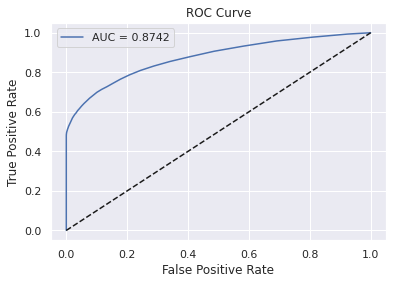

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

##### KS

In [ ]:
df_actual_predicted = df_actual_predicted.sort_values('y_pred_proba')
df_actual_predicted = df_actual_predicted.reset_index()

df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())

In [ ]:
df_actual_predicted.head()

,index,y_actual,y_pred_proba,Cumulative N Population,Cumulative N Bad,Cumulative N Good,Cumulative Perc Population,Cumulative Perc Bad,Cumulative Perc Good
0,34605,0,0.0,1,0,1,0.000011,0.0,0.000012
1,352246,0,0.0,2,0,2,0.000021,0.0,0.000024
2,182467,0,0.0,3,0,3,0.000032,0.0,0.000036
3,159877,0,0.0,4,0,4,0.000043,0.0,0.000048
4,80245,0,0.0,5,0,5,0.000054,0.0,0.000060


Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.5985')

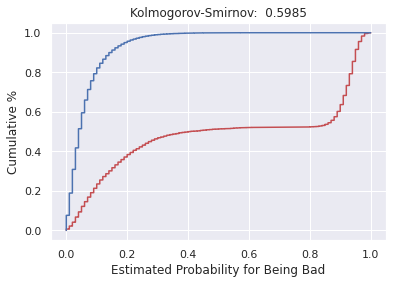

In [ ]:
KS = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])

plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)

The model that was built resulted in the performance of AUC = 0.87 and KS = 0.59. In the world of credit risk modeling, generally AUC above 0.7 and KS above 0.3 is considered a good performance.

## Hyperparameter Tuning Model

### Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       n_estimators = [100], #[int(x) for x in np.linspace(start = 100, stop = 100, num = 20)], # Jumlah subtree 
                       bootstrap = [True], # Apakah pakai bootstrapping atau tidak
                       criterion = ['gini','entropy'],
                       max_depth = [10,20,25,30,35],  # Maximum kedalaman tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       min_samples_leaf = [1,2,3,4,5,6,7,8,9,10], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                       max_features = ['auto', 'sqrt', 'log2'], # Jumlah feature yg dipertimbangkan pada masing-masing split
                       n_jobs = [-1], # Core untuk parallel computation. -1 untuk menggunakan semua core
                      )

rf = RandomForestClassifier(random_state=42)
gsrf = GridSearchCV(rf, hyperparameters, cv=5, scoring='roc_auc')
rsrf = RandomizedSearchCV(rf, hyperparameters, random_state=42, cv=5, scoring='roc_auc')
rsrf.fit(x_train,y_train)

# Predict & Evaluation
eval_classification(rsrf)

Accuracy (Test Set): 0.94
Accuracy (Train Set): 0.94
Precision (Test Set): 1.00
Precision (Train Set): 1.00
Recall (Test Set): 0.48
Recall (Train Set): 0.49
F1-Score (Test Set): 0.65
F1-Score (Train Set): 0.66
AUC (test-proba): 0.88
AUC (train-proba): 0.97


In [ ]:
rsrf.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 25,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

We can see that the results of the model that have been tuned are not much different from the previous one

## Feature Importance

### Random Forest

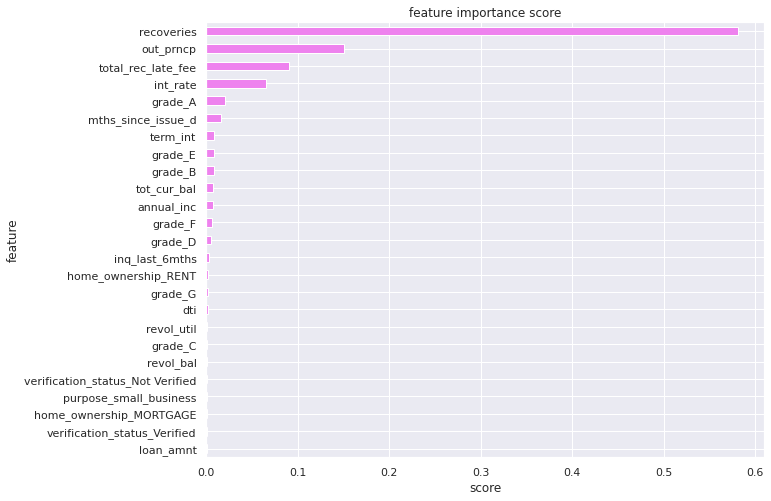

In [ ]:
show_feature_importance(rf)

The 5 most influential features on the model are recoveries, out_prncp, total_rec_late_fee, int_rate, and grade_a.
Description:
1. recoveries = post charge off gross recovery
2. out_prncp = Remaining outstanding principal for total amount funded
3. total_rec_late_fee = Late fees received to date
4. int_rate = Interest Rate on the loan
5. grade_a = LC assigned loan grade A

## Confusion Matrix

### Random Forest

Accuracy = 0.94
Recall = 0.48



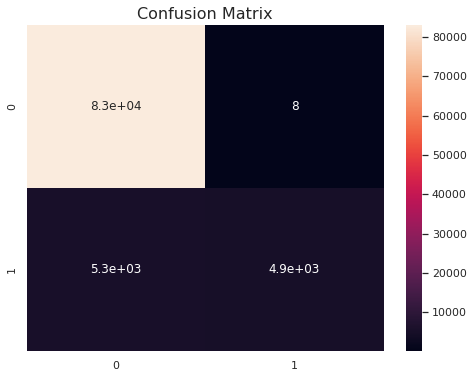

In [ ]:
from sklearn.metrics import confusion_matrix

rsrf.fit(x_train, y_train)
preds = rsrf.predict(x_test)

print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size=16)
sns.heatmap(cm, annot=True) #cmap='gist_yarg');